## Importare le librerie

Per prima cosa importo le librerie che mi servono per lavorare con i dati e fare i grafici.

In [1]:
# importo pandas per leggere i dati
import pandas as pd

# importo matplotlib e seaborn per fare i grafici
import matplotlib.pyplot as plt
import seaborn as sns

# questo serve per far vedere i grafici nel notebook
%matplotlib inline

# setto lo stile di seaborn perche mi piace di piu
sns.set_style('whitegrid')

## Caricare il dataset

Adesso carico il file CSV con i dati dei videogiochi.

In [2]:
# leggo il file CSV
df = pd.read_csv('data/vgsales_clean.csv')

# vedo le prime righe per capire com'e fatto
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Esplorare il dataset

Voglio capire che tipo di dati ho e se ci sono problemi. Uso `.info()` per vedere le colonne e `.isnull().sum()` per vedere se mancano dei dati.

In [3]:
# vedo le informazioni sulle colonne
print("Informazioni sul dataset:")
print(df.info())

print("\n" + "="*50 + "\n")

# conto quanti dati mancano per ogni colonna
print("Valori mancanti per colonna:")
print(df.isnull().sum())

Informazioni sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory 

### Cosa ho capito dai dati

Ho visto che ci sono diverse colonne con dati mancanti. Non so esattamente quale sia il modo migliore per sistemarli, ma provo a fare qualcosa di semplice per non avere problemi dopo con i grafici.

## Sistemare i dati mancanti

Faccio una pulizia molto basica dei dati. Per le colonne con testo metto "Unknown" dove manca il dato, per l'anno metto il valore più comune e per User_Score provo a convertirlo in numero.

In [4]:
# riempio i valori mancanti nelle colonne di testo con "Unknown"
df['Name'] = df['Name'].fillna('Unknown')
df['Genre'] = df['Genre'].fillna('Unknown')
df['Publisher'] = df['Publisher'].fillna('Unknown')
df['Developer'] = df['Developer'].fillna('Unknown')
df['Rating'] = df['Rating'].fillna('Unknown')

# per l'anno metto il valore più frequente (moda)
year_mode = df['Year_of_Release'].mode()[0]
df['Year_of_Release'] = df['Year_of_Release'].fillna(year_mode)

# converto User_Score in numero (alcuni valori sono strani tipo 'tbd')
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

# vedo se adesso va meglio
print("Valori mancanti dopo la pulizia:")
print(df.isnull().sum())

Valori mancanti dopo la pulizia:
Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer             0
Rating                0
dtype: int64


### Spiegazione della pulizia

Ho fatto così perché mancavano dei dati e mi sembrava il modo più facile per sistemare. Non so se è il metodo migliore, ma almeno adesso i grafici dovrebbero funzionare senza errori. Ho messo "Unknown" per le cose che non sapevo e per l'anno ho usato quello più comune perché non sapevo cosa mettere.

## Analisi dei Generi

Voglio vedere quali sono i generi più comuni nel dataset. Faccio un grafico a barre per contare quanti giochi ci sono per ogni genere.

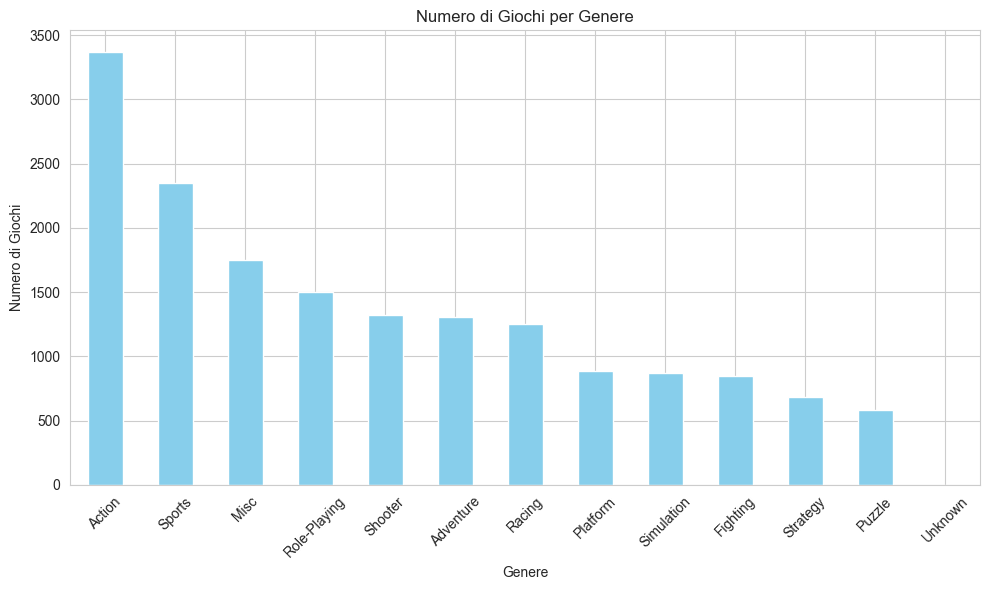

In [5]:
# conto quanti giochi per ogni genere
genre_counts = df['Genre'].value_counts()

# faccio il grafico
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Numero di Giochi per Genere')
plt.xlabel('Genere')
plt.ylabel('Numero di Giochi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cosa vedo dal grafico dei generi

Si vede che i generi Action e Sports sono i più comuni nel dataset. Forse questo significa che questi generi vengono prodotti di più dalle case di videogiochi. Non sono sicuro se vendono anche di più, ma sicuramente ci sono tanti giochi di questi tipi.

## Analisi delle Piattaforme

Adesso guardo quali piattaforme hanno più giochi. Faccio un grafico delle prime 15 piattaforme.

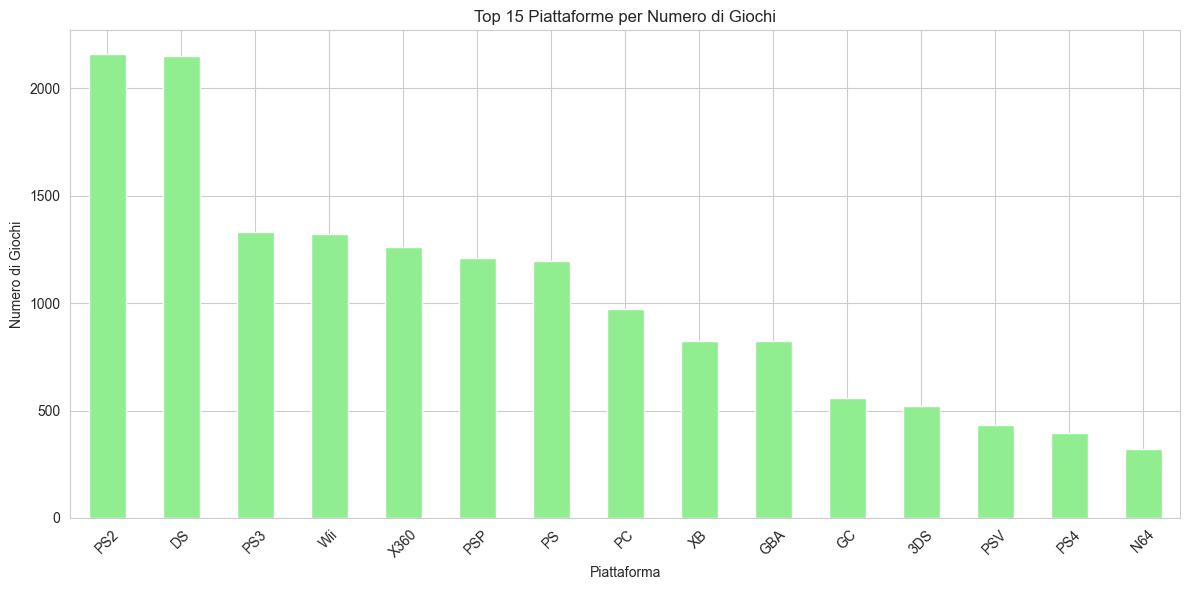

In [6]:
# conto quanti giochi per piattaforma e prendo le prime 15
platform_counts = df['Platform'].value_counts().head(15)

# faccio il grafico
plt.figure(figsize=(12, 6))
platform_counts.plot(kind='bar', color='lightgreen')
plt.title('Top 15 Piattaforme per Numero di Giochi')
plt.xlabel('Piattaforma')
plt.ylabel('Numero di Giochi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cosa vedo dalle piattaforme

Le piattaforme DS e PS2 sembrano avere tantissimi giochi. Probabilmente erano molto popolari quando erano attive. Le console PlayStation e Xbox sembrano tutte abbastanza presenti. Forse per decidere su quale piattaforma pubblicare bisognerebbe guardare anche le vendite, ma intanto vedo che alcune piattaforme hanno più giochi di altre.

## Vendite nel Tempo

Voglio vedere come sono andate le vendite globali negli anni. Sommo tutte le vendite per ogni anno e faccio un grafico.

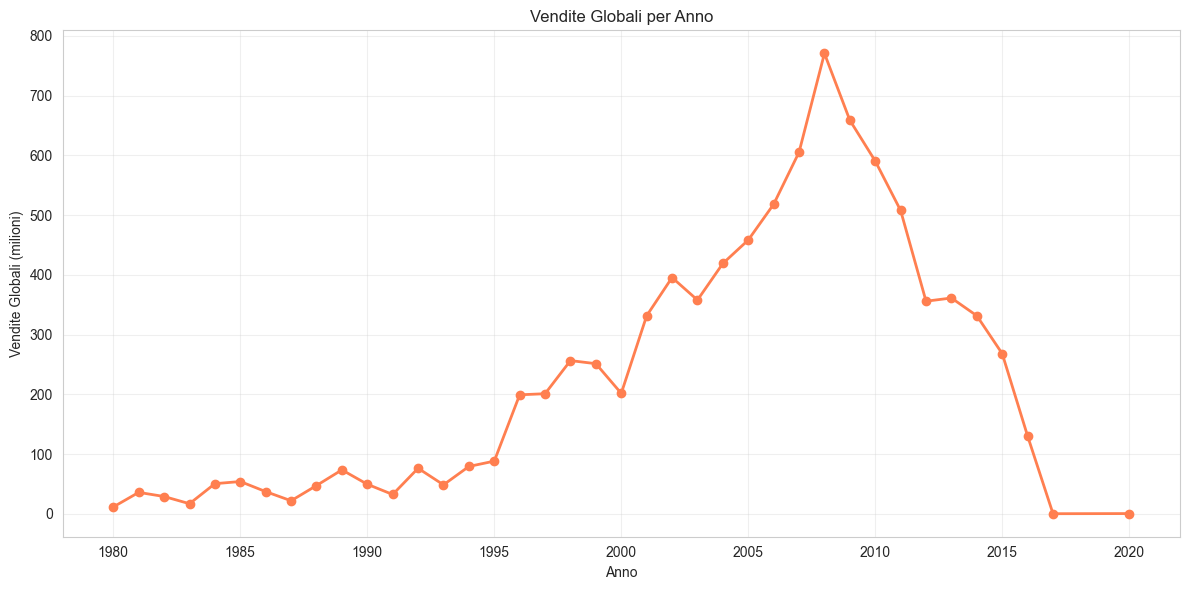

In [7]:
# sommo le vendite globali per anno
sales_by_year = df.groupby('Year_of_Release')['Global_Sales'].sum().sort_index()

# faccio il grafico a linea
plt.figure(figsize=(12, 6))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', color='coral', linewidth=2)
plt.title('Vendite Globali per Anno')
plt.xlabel('Anno')
plt.ylabel('Vendite Globali (milioni)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cosa vedo dalle vendite nel tempo

Si vede che le vendite sono cresciute tanto fino a un certo punto e poi sono un po' diminuite. Forse il picco era intorno al 2008-2010. Non so esattamente perché, forse c'era più interesse per i videogiochi in quegli anni o forse erano uscite console nuove. Negli ultimi anni sembra che le vendite siano più basse, ma potrebbe anche essere che nel dataset ci sono meno dati recenti.

## Distribuzione delle Vendite Globali

Faccio un istogramma per vedere come sono distribuite le vendite. Voglio capire se ci sono tanti giochi che vendono poco e pochi che vendono tanto.

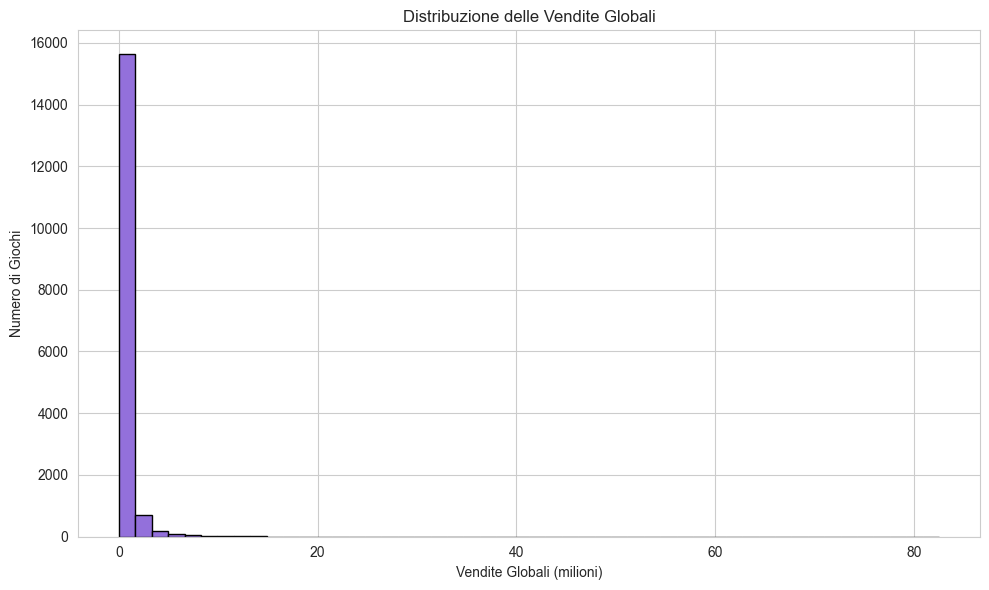

In [8]:
# faccio l'istogramma delle vendite globali
plt.figure(figsize=(10, 6))
plt.hist(df['Global_Sales'], bins=50, color='mediumpurple', edgecolor='black')
plt.title('Distribuzione delle Vendite Globali')
plt.xlabel('Vendite Globali (milioni)')
plt.ylabel('Numero di Giochi')
plt.tight_layout()
plt.show()

### Cosa vedo dalla distribuzione delle vendite

Si vede chiaramente che la maggior parte dei giochi vende molto poco. Ci sono tantissimi giochi concentrati a sinistra del grafico, che significa vendite basse. Solo pochi giochi vendono tantissimo. Questo è un po' quello che mi aspettavo, perché so che ci sono pochi giochi famosi tipo Mario o Call of Duty che vendono milioni di copie, mentre tanti altri giochi vendono poco.

## Top Publisher

Voglio vedere quali sono i publisher che hanno pubblicato più giochi. Prendo i top 10 e faccio un grafico.

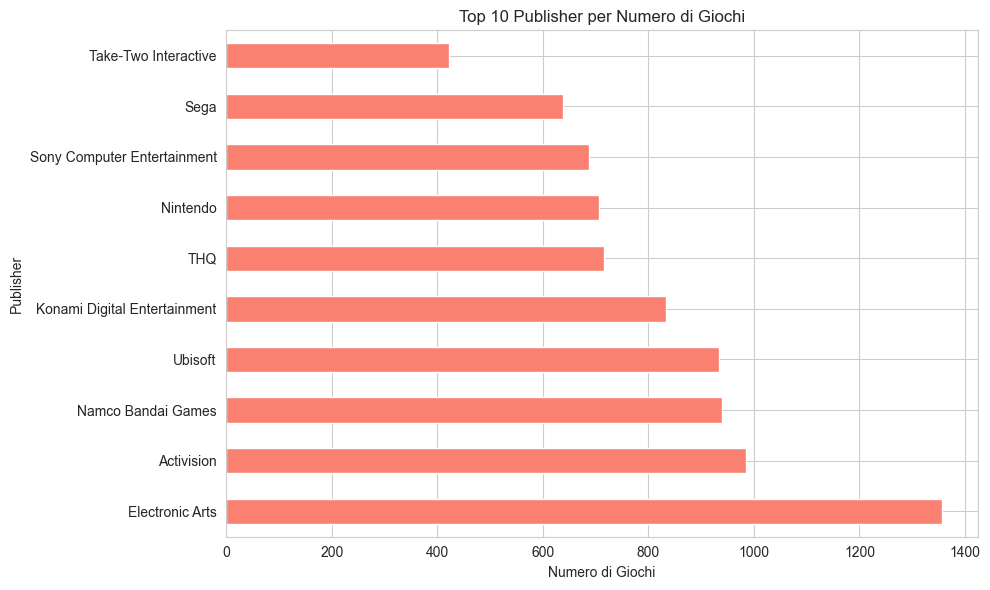

In [9]:
# conto i giochi per publisher e prendo i top 10
top_publishers = df['Publisher'].value_counts().head(10)

# faccio il grafico
plt.figure(figsize=(10, 6))
top_publishers.plot(kind='barh', color='salmon')
plt.title('Top 10 Publisher per Numero di Giochi')
plt.xlabel('Numero di Giochi')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

### Cosa vedo dai publisher

Electronic Arts sembra essere il publisher con più giochi, seguito da Activision e Namco Bandai. Questi sono nomi che conosco e sono compagnie grandi. Forse hanno più risorse per produrre tanti giochi diversi. Non so se avere tanti giochi significa anche vendere di più, ma sicuramente sono molto attivi nel mercato.

## Analisi delle Recensioni della Critica

Adesso voglio vedere se le recensioni della critica influenzano le vendite. Prima guardo come sono distribuiti i voti della critica.

Giochi con voto della critica: 8137


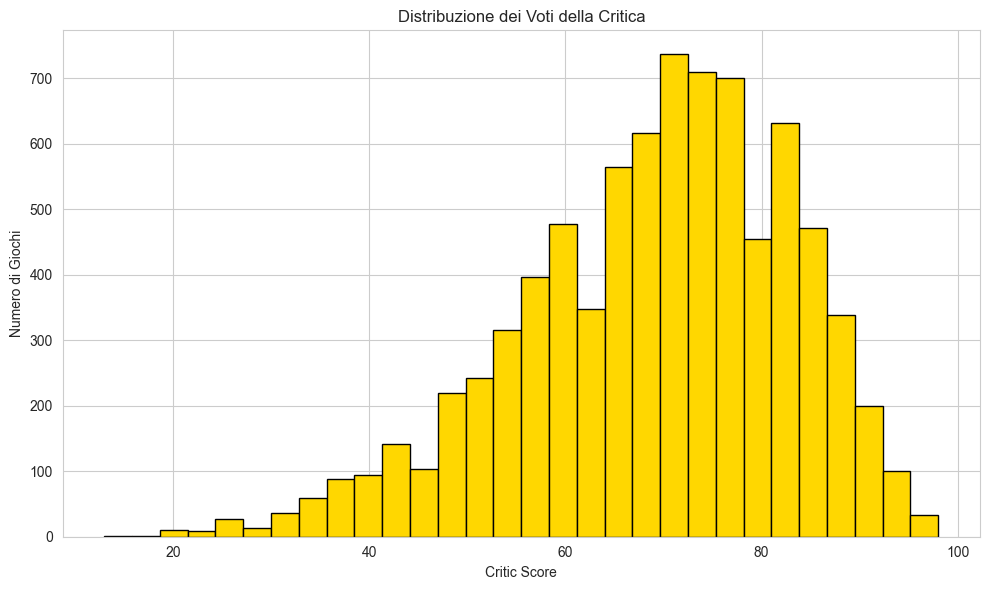

In [10]:
# prendo solo i giochi che hanno un voto della critica
df_critic = df.dropna(subset=['Critic_Score'])

print(f"Giochi con voto della critica: {len(df_critic)}")

# faccio l'istogramma dei voti della critica
plt.figure(figsize=(10, 6))
plt.hist(df_critic['Critic_Score'], bins=30, color='gold', edgecolor='black')
plt.title('Distribuzione dei Voti della Critica')
plt.xlabel('Critic Score')
plt.ylabel('Numero di Giochi')
plt.tight_layout()
plt.show()

### Cosa vedo dai voti della critica

Sembra che i voti della critica siano distribuiti in modo abbastanza normale, con molti giochi che prendono voti medi (tipo 70-80). Ci sono pochi giochi con voti molto bassi o molto alti. La maggior parte dei giochi recensiti dalla critica sembra avere una qualità decente. Forse i giochi molto brutti non vengono neanche recensiti.

## Relazione tra Voti della Critica e Vendite

Faccio un grafico scatter per vedere se c'è una relazione tra il voto della critica e le vendite globali.

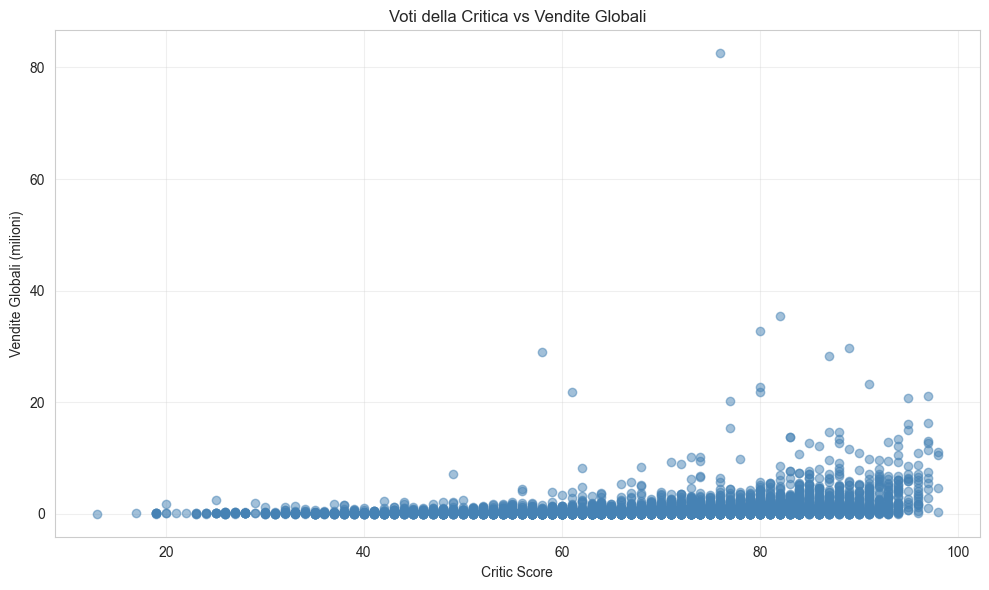

In [11]:
# faccio lo scatter plot tra critic score e vendite
plt.figure(figsize=(10, 6))
plt.scatter(df_critic['Critic_Score'], df_critic['Global_Sales'], alpha=0.5, color='steelblue')
plt.title('Voti della Critica vs Vendite Globali')
plt.xlabel('Critic Score')
plt.ylabel('Vendite Globali (milioni)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cosa vedo dalla relazione critica-vendite

Il grafico è un po' confuso ma sembra che i giochi con voti più alti tendano a vendere un po' di più. Però ci sono anche giochi con voti bassi che vendono tanto e giochi con voti alti che vendono poco. Forse le recensioni contano un po' ma non sono l'unica cosa importante. Probabilmente il marketing, il franchise e altri fattori influenzano le vendite.

## Analisi delle Recensioni degli Utenti

Guardo anche i voti degli utenti per vedere se sono diversi da quelli della critica.

Giochi con voto degli utenti: 7590


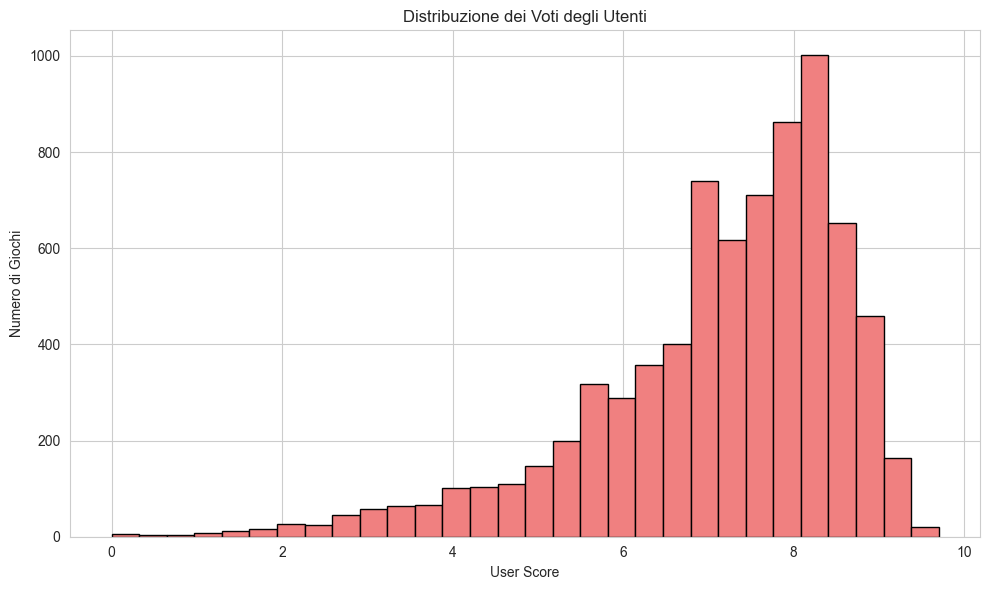

In [12]:
# prendo solo i giochi che hanno un voto degli utenti
df_user = df.dropna(subset=['User_Score'])

print(f"Giochi con voto degli utenti: {len(df_user)}")

# faccio l'istogramma dei voti degli utenti
plt.figure(figsize=(10, 6))
plt.hist(df_user['User_Score'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribuzione dei Voti degli Utenti')
plt.xlabel('User Score')
plt.ylabel('Numero di Giochi')
plt.tight_layout()
plt.show()

### Cosa vedo dai voti degli utenti

I voti degli utenti sembrano un po' più alti in generale rispetto a quelli della critica. La maggior parte dei giochi ha voti tra 7 e 9. Forse gli utenti sono più generosi con i voti oppure chi vota sono solo quelli a cui è piaciuto il gioco. Non sono sicuro, ma sembra che gli utenti diano voti migliori della critica.

## Relazione tra Voti degli Utenti e Vendite

Come per la critica, guardo se i voti degli utenti influenzano le vendite.

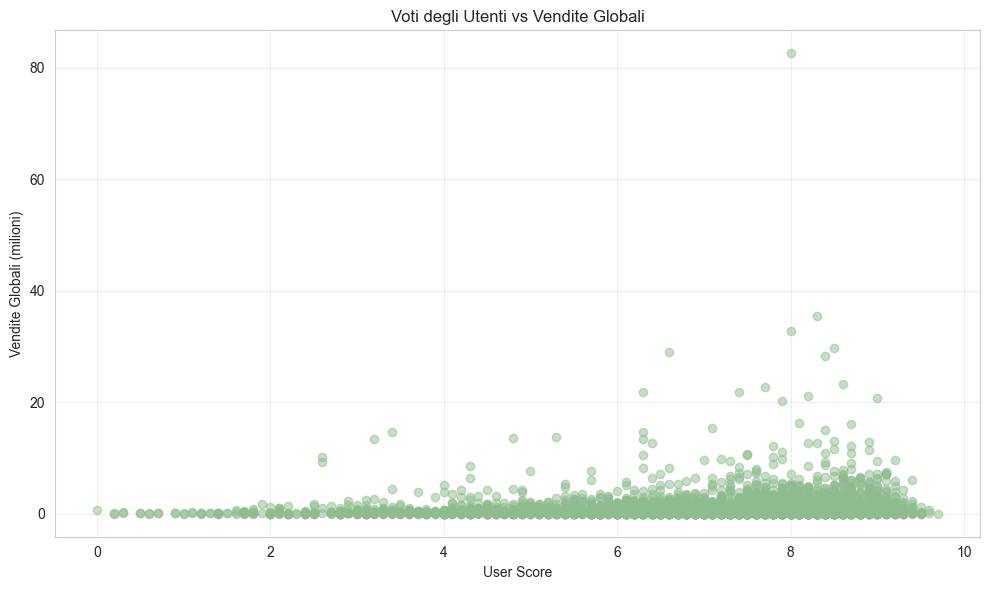

In [13]:
# faccio lo scatter plot tra user score e vendite
plt.figure(figsize=(10, 6))
plt.scatter(df_user['User_Score'], df_user['Global_Sales'], alpha=0.5, color='darkseagreen')
plt.title('Voti degli Utenti vs Vendite Globali')
plt.xlabel('User Score')
plt.ylabel('Vendite Globali (milioni)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Cosa vedo dalla relazione utenti-vendite

Anche qui la situazione è simile a quella della critica. Non c'è una relazione super chiara. Sembra che i giochi con voti degli utenti più alti vendano leggermente di più, ma ci sono tante eccezioni. Forse le recensioni degli utenti arrivano dopo che il gioco è già uscito e ha già venduto, quindi non influenzano tanto le vendite iniziali. Bisognerebbe approfondire, ma intanto questo è quello che vedo dai dati.

## Vendite per Genere

Voglio vedere quali generi vendono di più in totale. Sommo le vendite globali per ogni genere.

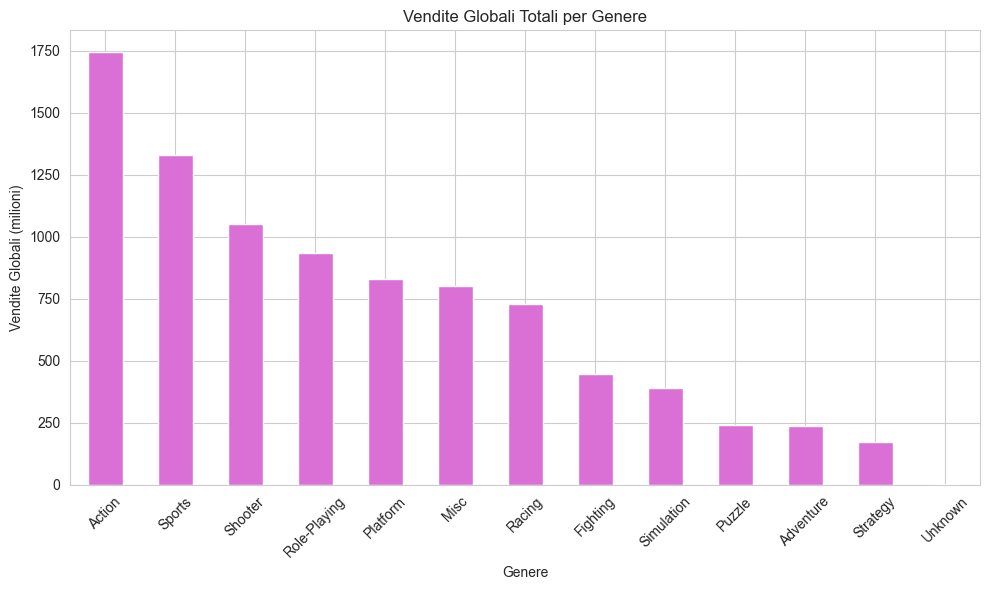

In [14]:
# sommo le vendite per genere
sales_by_genre = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# faccio il grafico
plt.figure(figsize=(10, 6))
sales_by_genre.plot(kind='bar', color='orchid')
plt.title('Vendite Globali Totali per Genere')
plt.xlabel('Genere')
plt.ylabel('Vendite Globali (milioni)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cosa vedo dalle vendite per genere

Action è il genere che vende di più in totale, seguito da Sports e Shooter. Questo è interessante perché Action era anche uno dei generi con più giochi. Quindi probabilmente è un genere molto popolare sia per i produttori che per i giocatori. Se dobbiamo decidere su quale genere puntare, questi tre sembrano quelli più sicuri.

## Generi Preferiti dei Top Publisher

Adesso voglio vedere quali generi producono di più le aziende che fanno più giochi. Prendo le prime 3 e guardo i loro generi preferiti.

Top 3 publisher: ['Electronic Arts', 'Activision', 'Namco Bandai Games']


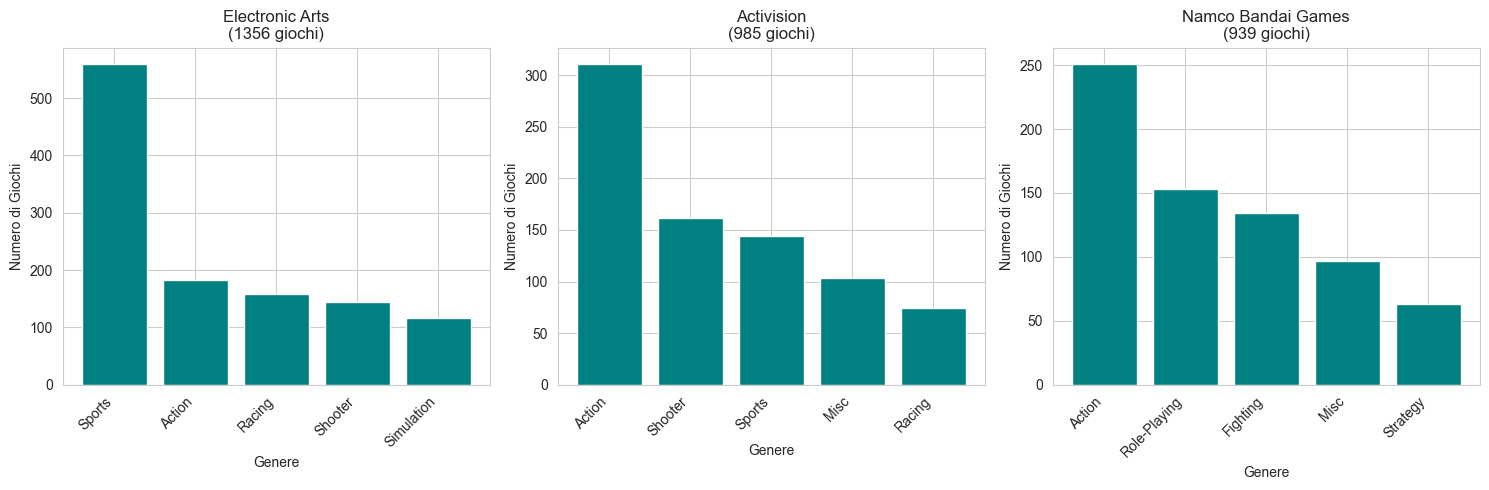

In [15]:
# prendo i top 3 publisher
top_3_publishers = df['Publisher'].value_counts().head(3).index.tolist()

print(f"Top 3 publisher: {top_3_publishers}")

# creo un grafico con 3 subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# per ogni publisher faccio un grafico
for i, publisher in enumerate(top_3_publishers):
    # filtro i dati per questo publisher
    publisher_data = df[df['Publisher'] == publisher]
    
    # conto i generi
    genre_counts = publisher_data['Genre'].value_counts().head(5)
    
    # faccio il grafico
    axes[i].bar(range(len(genre_counts)), genre_counts.values, color='teal')
    axes[i].set_title(f'{publisher}\n({len(publisher_data)} giochi)')
    axes[i].set_xlabel('Genere')
    axes[i].set_ylabel('Numero di Giochi')
    axes[i].set_xticks(range(len(genre_counts)))
    axes[i].set_xticklabels(genre_counts.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Cosa vedo dai generi dei top publisher

Si vede che ogni publisher ha delle preferenze diverse. Electronic Arts sembra fare tanti giochi Sports, mentre altri publisher si concentrano su altri generi. Forse ogni compagnia ha le sue specialità e cerca di fare giochi in quei generi dove è brava. Questo è utile per capire cosa fa la concorrenza e dove ci sono più opportunità.

## Generi e Piattaforme

Voglio capire se certi generi vendono meglio su certe piattaforme. Prendo le piattaforme più popolari e vedo quali generi funzionano meglio su ognuna.

Top 5 piattaforme: ['PS2', 'DS', 'PS3', 'Wii', 'X360']


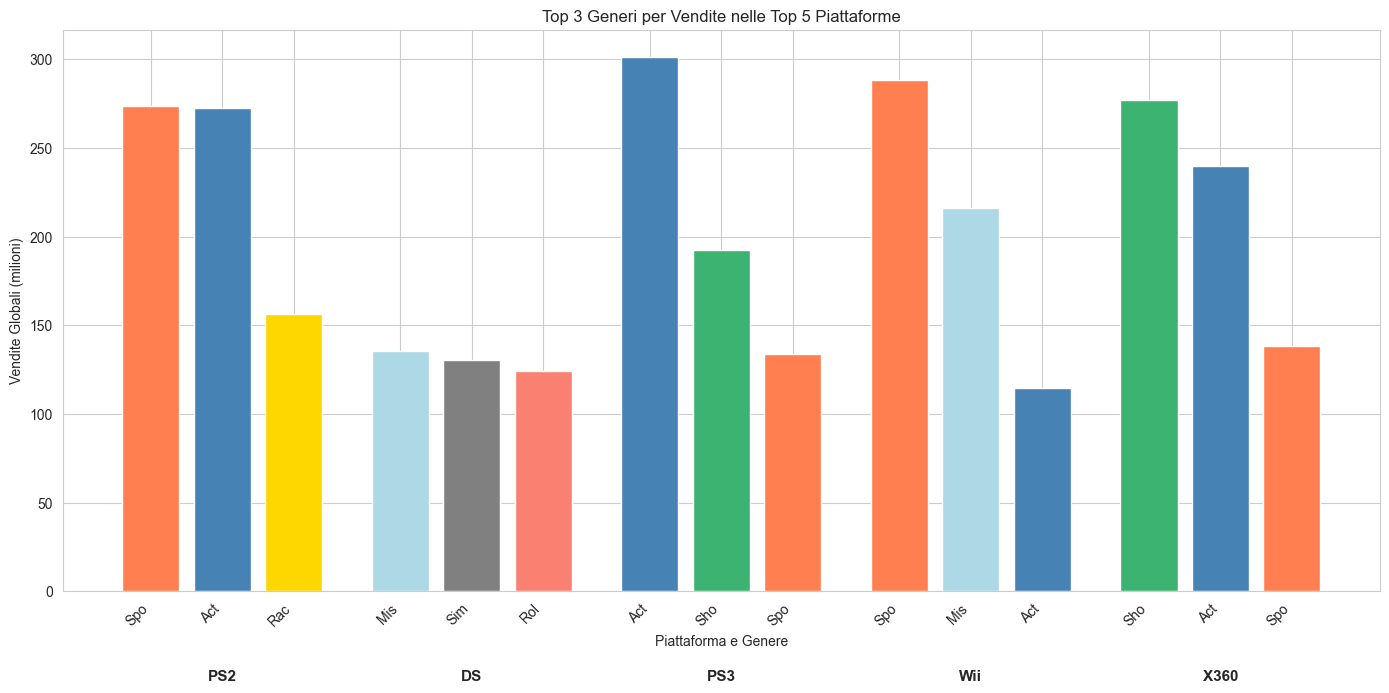

In [16]:
# prendo le top 5 piattaforme per numero di giochi
top_5_platforms = df['Platform'].value_counts().head(5).index.tolist()

print(f"Top 5 piattaforme: {top_5_platforms}")

# creo una tabella con piattaforma, genere e vendite totali
platform_genre_sales = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# filtro solo le top 5 piattaforme
platform_genre_sales = platform_genre_sales[platform_genre_sales['Platform'].isin(top_5_platforms)]

# per ogni piattaforma prendo i top 3 generi
top_genres_per_platform = []
for platform in top_5_platforms:
    platform_data = platform_genre_sales[platform_genre_sales['Platform'] == platform]
    top_3 = platform_data.nlargest(3, 'Global_Sales')
    top_genres_per_platform.append(top_3)

# unisco tutto in un dataframe
result = pd.concat(top_genres_per_platform)

# creo il grafico a barre
plt.figure(figsize=(14, 7))
x_pos = []
x_labels = []
colors_list = []
color_map = {'Action': 'steelblue', 'Sports': 'coral', 'Shooter': 'mediumseagreen', 
             'Racing': 'gold', 'Platform': 'mediumpurple', 'Role-Playing': 'salmon',
             'Misc': 'lightblue', 'Fighting': 'orange'}

position = 0
for platform in top_5_platforms:
    platform_data = result[result['Platform'] == platform]
    for idx, row in platform_data.iterrows():
        plt.bar(position, row['Global_Sales'], color=color_map.get(row['Genre'], 'gray'))
        x_pos.append(position)
        x_labels.append(f"{row['Genre'][:3]}")
        position += 1
    position += 0.5  # spazio tra piattaforme

plt.xlabel('Piattaforma e Genere')
plt.ylabel('Vendite Globali (milioni)')
plt.title('Top 3 Generi per Vendite nelle Top 5 Piattaforme')
plt.xticks(x_pos, x_labels, rotation=45, ha='right')

# aggiungo le etichette delle piattaforme
platform_positions = [1, 4.5, 8, 11.5, 15]
for i, platform in enumerate(top_5_platforms):
    plt.text(platform_positions[i], -50, platform, ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

### Cosa vedo dalla relazione generi-piattaforme

Si vede che ogni piattaforma ha dei generi che vendono meglio. Per esempio sembra che alcune piattaforme vendano più giochi Sports mentre altre vendono più Action o Shooter. Questo è importante perché se vogliamo fare un gioco dovremmo considerare su quale piattaforma pubblicarlo in base al genere. Non tutte le piattaforme sono uguali per tutti i generi.

## Vita Commerciale dei Giochi

Voglio capire quanto dura il successo di un gioco. Guardo come si distribuiscono le vendite negli anni successivi all'uscita.

In [ ]:
# prendo giochi usciti da almeno qualche anno per vedere il pattern
recent_years = df[df['Year_of_Release'] >= 2000].copy()

# calcolo quanti anni sono passati dall'uscita (uso 2016 come anno di riferimento del dataset)
recent_years['Years_Since_Release'] = 2016 - recent_years['Year_of_Release']

# raggruppo per anni dall'uscita e calcolo le vendite medie
sales_by_age = recent_years.groupby('Years_Since_Release')['Global_Sales'].mean()

# prendo solo i primi 10 anni
sales_by_age = sales_by_age[sales_by_age.index <= 10].sort_index()

# faccio il grafico
plt.figure(figsize=(10, 6))
plt.plot(sales_by_age.index, sales_by_age.values, marker='o', linewidth=2, color='darkviolet')
plt.title('Vendite Medie per Anni dall\'Uscita')
plt.xlabel('Anni dall\'Uscita')
plt.ylabel('Vendite Medie (milioni)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVendite medie nei primi 3 anni: {sales_by_age[sales_by_age.index <= 3].mean():.2f} milioni")
print(f"Vendite medie dopo 5 anni: {sales_by_age[sales_by_age.index > 5].mean():.2f} milioni")

### Cosa vedo dalla vita commerciale

Si vede che i giochi più vecchi hanno vendite medie più alte. Questo probabilmente significa che i giochi che sono rimasti nel mercato per tanti anni sono quelli di successo, mentre quelli che vendono poco spariscono subito. Non è che i giochi continuano a vendere per 10 anni, ma i giochi che esistono da 10 anni nel dataset sono quelli che hanno avuto successo. Quindi sembra che i primi anni siano cruciali per il successo di un gioco.

### Cosa vedo dai giochi HIT

I giochi che vendono di più sembrano essere soprattutto Sports, Platform e Shooter. Nintendo sembra dominare con tanti giochi nella top 20, specialmente sulla Wii. Questo mi fa capire che per fare un gioco di grande successo serve probabilmente un brand forte o un franchise conosciuto. La maggior parte dei giochi HIT sono parte di serie famose come Mario, Pokemon, Call of Duty.

In [ ]:
# prendo i top 20 giochi per vendite
top_games = df.nlargest(20, 'Global_Sales')[['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'Global_Sales']]

print("Top 20 giochi di maggior successo:")
print(top_games.to_string(index=False))

# vedo la distribuzione di generi e piattaforme nei giochi HIT
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# generi nei top 20
genre_hits = top_games['Genre'].value_counts()
axes[0].bar(range(len(genre_hits)), genre_hits.values, color='gold')
axes[0].set_title('Generi nei Top 20 Giochi')
axes[0].set_xlabel('Genere')
axes[0].set_ylabel('Numero di Giochi')
axes[0].set_xticks(range(len(genre_hits)))
axes[0].set_xticklabels(genre_hits.index, rotation=45, ha='right')

# piattaforme nei top 20
platform_hits = top_games['Platform'].value_counts()
axes[1].bar(range(len(platform_hits)), platform_hits.values, color='orange')
axes[1].set_title('Piattaforme nei Top 20 Giochi')
axes[1].set_xlabel('Piattaforma')
axes[1].set_ylabel('Numero di Giochi')
axes[1].set_xticks(range(len(platform_hits)))
axes[1].set_xticklabels(platform_hits.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Giochi HIT di Successo

Voglio vedere quali sono i giochi che hanno venduto tantissimo. Prendo i top 20 giochi per vendite e guardo le loro caratteristiche.

### Cosa vedo dalle differenze regionali

Si vede chiaramente che i gusti sono molto diversi tra le regioni. Il Giappone sembra preferire Role-Playing molto di più rispetto ad America ed Europa. L'America e l'Europa invece sembrano preferire Action e Shooter. Questo è importante perché se vogliamo fare un gioco per il mercato giapponese dovremmo pensare a generi diversi rispetto a un gioco per l'occidente. Ogni mercato ha le sue preferenze.

In [ ]:
# calcolo le vendite per genere in ogni regione
regional_sales = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales']].sum()

# prendo i top 8 generi per vendite globali
top_genres = df.groupby('Genre')['Global_Sales'].sum().nlargest(8).index
regional_sales_top = regional_sales.loc[top_genres]

# faccio il grafico con le 3 regioni
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

regions = [('NA_Sales', 'Nord America', 'steelblue'), 
           ('EU_Sales', 'Europa', 'coral'), 
           ('JP_Sales', 'Giappone', 'mediumseagreen')]

for i, (col, title, color) in enumerate(regions):
    regional_sales_top[col].sort_values(ascending=True).plot(kind='barh', ax=axes[i], color=color)
    axes[i].set_title(f'Top Generi in {title}')
    axes[i].set_xlabel('Vendite (milioni)')
    axes[i].set_ylabel('Genere')

plt.tight_layout()
plt.show()

# mostro anche le percentuali
print("\nPercentuale vendite per genere per regione:")
regional_pct = regional_sales_top.div(regional_sales_top.sum(axis=0), axis=1) * 100
print(regional_pct.round(1))

## Differenze tra Mercati Regionali

Adesso voglio vedere se i gusti sono diversi in America, Europa e Giappone. Guardo quali generi vendono di più in ogni regione.

### Cosa vedo dalla profittabilità

Si vede che alcuni generi vendono meglio in media rispetto ad altri. Platform e Shooter sembrano essere molto profittevoli. Questo è diverso dal numero di giochi prodotti, quindi forse conviene fare pochi giochi di questi generi ma di alta qualità piuttosto che tanti giochi di generi meno profittevoli. Però bisogna anche considerare che fare un gioco Platform o Shooter potrebbe essere più difficile o costoso.

In [ ]:
# calcolo le vendite medie per gioco per ogni genere
genre_profitability = df.groupby('Genre').agg({
    'Global_Sales': ['sum', 'mean', 'count']
}).round(2)

# rinomino le colonne per renderle più chiare
genre_profitability.columns = ['Vendite_Totali', 'Vendite_Medie', 'Numero_Giochi']
genre_profitability = genre_profitability.sort_values('Vendite_Medie', ascending=False)

print("Profittabilità per genere:")
print(genre_profitability)

# faccio il grafico delle vendite medie
plt.figure(figsize=(10, 6))
genre_profitability['Vendite_Medie'].plot(kind='bar', color='darkturquoise')
plt.title('Vendite Medie per Gioco per Genere')
plt.xlabel('Genere')
plt.ylabel('Vendite Medie (milioni)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Generi Più Profittevoli nel Tempo

Voglio vedere quali generi hanno fatto più soldi nel tempo. Calcolo le vendite medie per gioco in ogni genere per capire quali sono i più profittevoli.

## Conclusioni

Dopo aver fatto questa analisi semplice, ho capito alcune cose:

- I generi più comuni sono Action, Sports e Shooter, e sono anche quelli che vendono di più
- Le piattaforme più attive nel dataset sono DS, PS2, PS3 e X360, ma bisognerebbe guardare dati più recenti per capire le tendenze attuali
- Le vendite sono cresciute molto fino al 2008-2010 e poi sono diminuite
- La maggior parte dei giochi vende poco, solo pochi vendono tantissimo
- Le recensioni della critica e degli utenti sembrano influenzare un po' le vendite, ma non è chiarissimo. Ci sono tanti altri fattori che contano
- Electronic Arts, Activision e Namco Bandai sono i publisher più attivi

Questo EDA è molto semplice e non fa analisi complesse. Servirebbe approfondire con modelli statistici più avanzati per capire meglio le relazioni tra i dati. Però spero che questi grafici diano un'idea generale dei pattern nel mercato dei videogiochi e possano aiutare a prendere decisioni su quali progetti sviluppare.